<h1>Intrusion Detection Classification </h1>

<h3> Libraries Required for classification</h3>
<p> Pandas and Numpy for calculations 
    sklearn library for model selection ,classification report , metrices and preprocessing</p>

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


<h3>Reading of csv file using pandas read_csv function</h3>

In [8]:
data=pd.read_csv('networkintrusion.csv')
data.dtypes


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
num_root                         int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

### Found some columns are categories and making them into categories

In [9]:
for each_col in data.columns:
    if(data[each_col].dtype=="object"):
        data[each_col]=data[each_col].astype('category')
        #print(len(data[each_col].unique()))

### Function for encoding text data into numerical data depending upon on number of categories

In [10]:
label_encoder = preprocessing.LabelEncoder()
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [11]:
data['protocol_type']=label_encoder.fit_transform(data['protocol_type'])
data['service']=label_encoder.fit_transform(data['service'])
data['flag']=label_encoder.fit_transform(data['flag'])
#encoding the target label to unique values so that classification can be done easily using Classification techniques.
data['class']=label_encoder.fit_transform(data['class'])

### Finding all the values which are zero in given dataset using isnull function in python.

In [13]:
#print(data.dtypes)
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      6
dst_bytes                      6
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          9
srv_count                      9
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

### Dropping of rows with NaN values in them as it is a huge data set

In [14]:
#
data=data.dropna()
data.shape

(22529, 40)

### Finding duplicates in the dataset using Duplicate function  and removing them

In [30]:
data=data[~data.duplicated()]
data.shape

(22472, 38)

### Correlation between the data 

<AxesSubplot:>

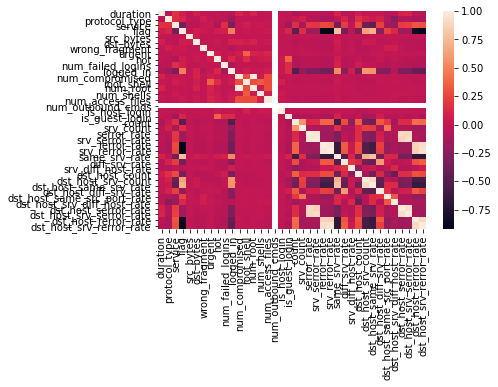

In [36]:
import seaborn as sns
coa=data.corr()
sns.heatmap(coa, 
        xticklabels=coa.columns,
        yticklabels=coa.columns)


### Dropping land column as it has very less variation and it does not effect the train percentage and we can decrease dependency on the data.dropping class column to make it as target

In [16]:
target=data['class']

data=data.drop(['land','class'],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0.0,0.0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,45,1,0.0,0.0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,9,12983.0,0.0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,0,13,9,20.0,0.0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,2,0.0,15.0,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71



### Train test split of the input data to train and test algorithm

In [17]:

xs_tr,xs_te,ys_tr,ys_te=train_test_split(data,target,test_size=0.3)

### Using Random Forest classifier for Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(xs_tr,ys_tr)

RandomForestClassifier()

### Predict function to predict the output with the testing data set 


In [19]:
y_pred=RF.predict(xs_te)
RF.score(xs_te,ys_te)

0.9875702870671796

### Finding the importance of each characteristic which is used while classification

In [20]:
importance = RF.feature_importances_

In [21]:
for i,v in enumerate(importance):
    print('Feature: %0d , Score: %.5f ' % (i,v))

Feature: 0 , Score: 0.03931 
Feature: 1 , Score: 0.02341 
Feature: 2 , Score: 0.06304 
Feature: 3 , Score: 0.04062 
Feature: 4 , Score: 0.13783 
Feature: 5 , Score: 0.14733 
Feature: 6 , Score: 0.00070 
Feature: 7 , Score: 0.00006 
Feature: 8 , Score: 0.01203 
Feature: 9 , Score: 0.00469 
Feature: 10 , Score: 0.03603 
Feature: 11 , Score: 0.00550 
Feature: 12 , Score: 0.00048 
Feature: 13 , Score: 0.00088 
Feature: 14 , Score: 0.00014 
Feature: 15 , Score: 0.00051 
Feature: 16 , Score: 0.00000 
Feature: 17 , Score: 0.00010 
Feature: 18 , Score: 0.00474 
Feature: 19 , Score: 0.02222 
Feature: 20 , Score: 0.02961 
Feature: 21 , Score: 0.00325 
Feature: 22 , Score: 0.00460 
Feature: 23 , Score: 0.00900 
Feature: 24 , Score: 0.00529 
Feature: 25 , Score: 0.01711 
Feature: 26 , Score: 0.01214 
Feature: 27 , Score: 0.00850 
Feature: 28 , Score: 0.01632 
Feature: 29 , Score: 0.06900 
Feature: 30 , Score: 0.06144 
Feature: 31 , Score: 0.05298 
Feature: 32 , Score: 0.03767 
Feature: 33 , Score:

### Graph for feature importances

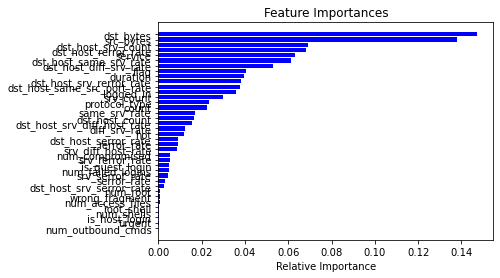

In [34]:
indices = np.argsort(importance)
colu=list(data.columns.values)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [colu[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
print(classification_report(ys_te, y_pred,target_names=['0:anomaly','1:normal']))

              precision    recall  f1-score   support

   0:anomaly       0.99      0.99      0.99      3840
    1:normal       0.99      0.98      0.99      2918

    accuracy                           0.99      6758
   macro avg       0.99      0.99      0.99      6758
weighted avg       0.99      0.99      0.99      6758



### Confusion matrix using Random Forest Classifier  

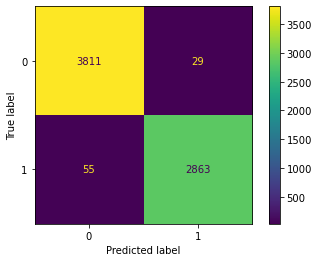

In [24]:

cm = confusion_matrix(ys_te, y_pred, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()

### Roc curve for the Random Forest Model 

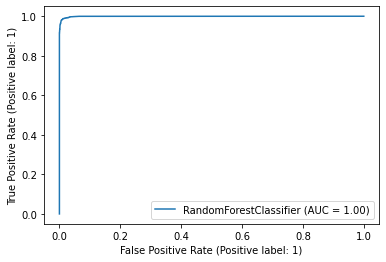

In [27]:

plot_roc_curve(RF, xs_te, ys_te) 

### Random Forest Tree used for Classification

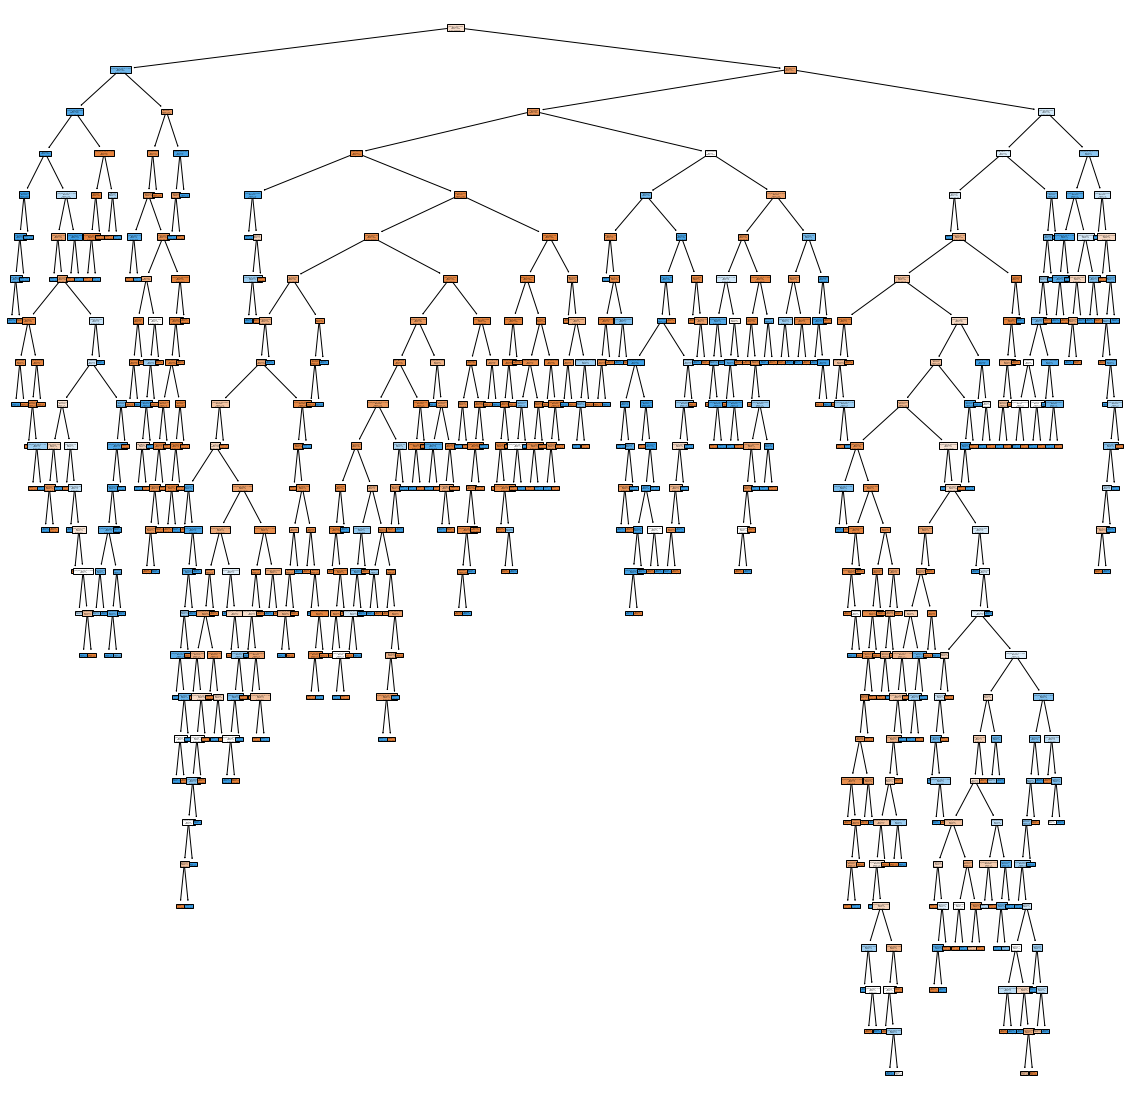

In [28]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(RF.estimators_[0], feature_names=data.columns, filled=True)

In [47]:
def plot_bar_x(label,class_training,title,xlabel,ylabel):
    plt.rcParams["figure.figsize"] = (40,10)
    index = np.arange(len(label))
    plt.bar(index, class_training)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=15)
    plt.title(title)
    plt.show()

### Classification using Decision Tree Classifier

In [55]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
classifier=decision_tree.fit(xs_tr,ys_tr)
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(xs_te,ys_te)))
score3 = classifier.score(xs_te,ys_te)

predicted_target=classifier.predict(xs_te)




The accuracy of the Decision Tree classifier on test data is 0.98


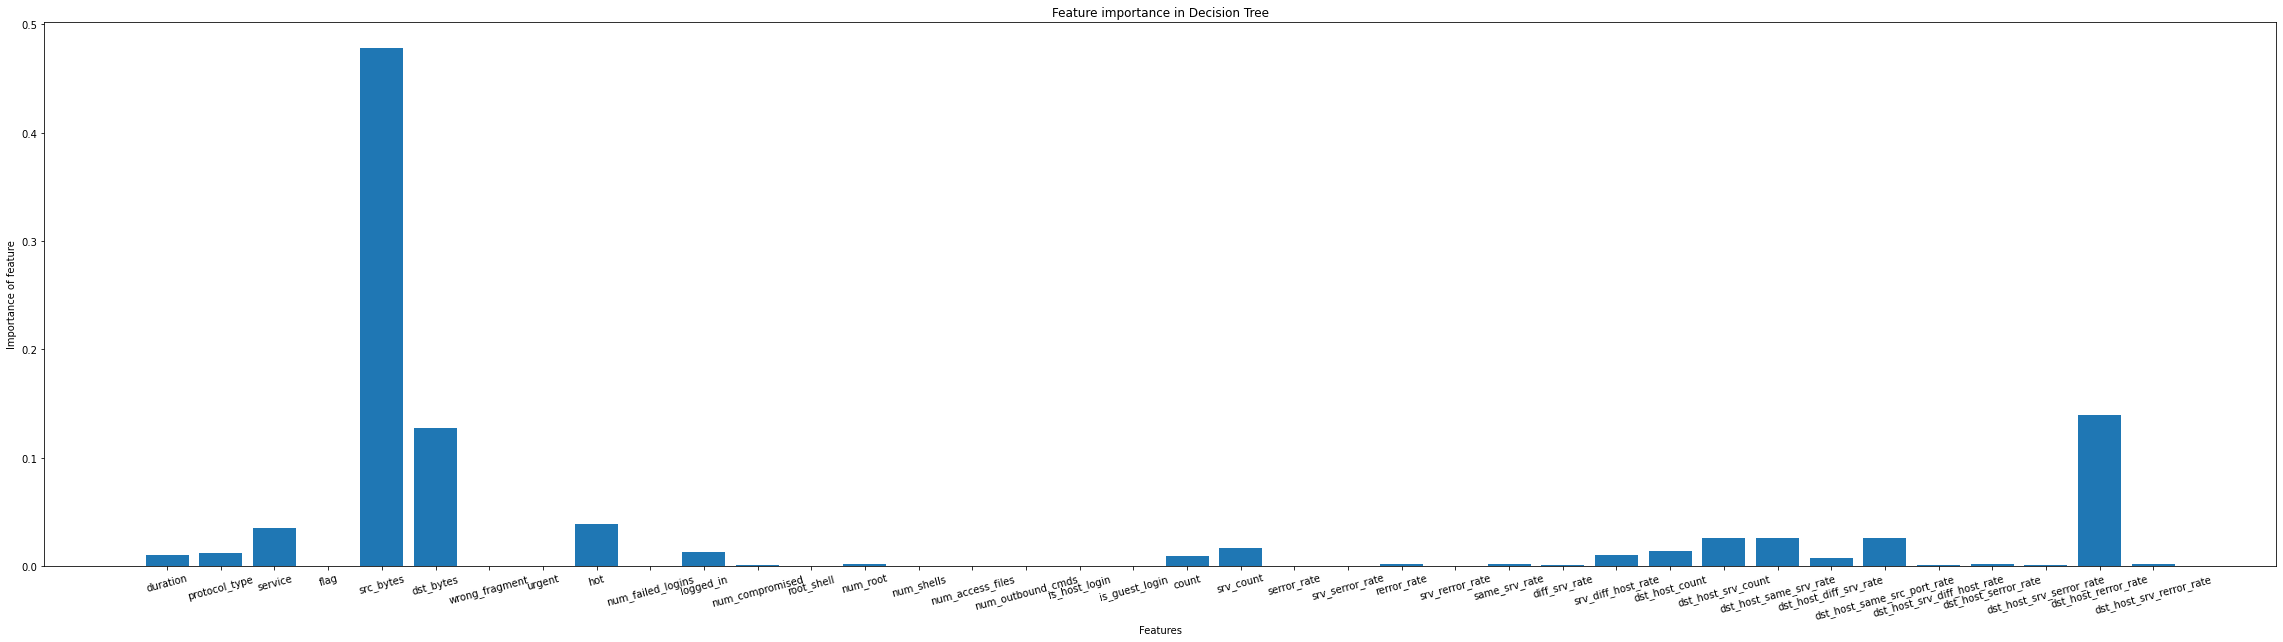

In [56]:
class_training = classifier.feature_importances_
plot_bar_x(colu,class_training,"Feature importance in Decision Tree","Features","Importance of feature")

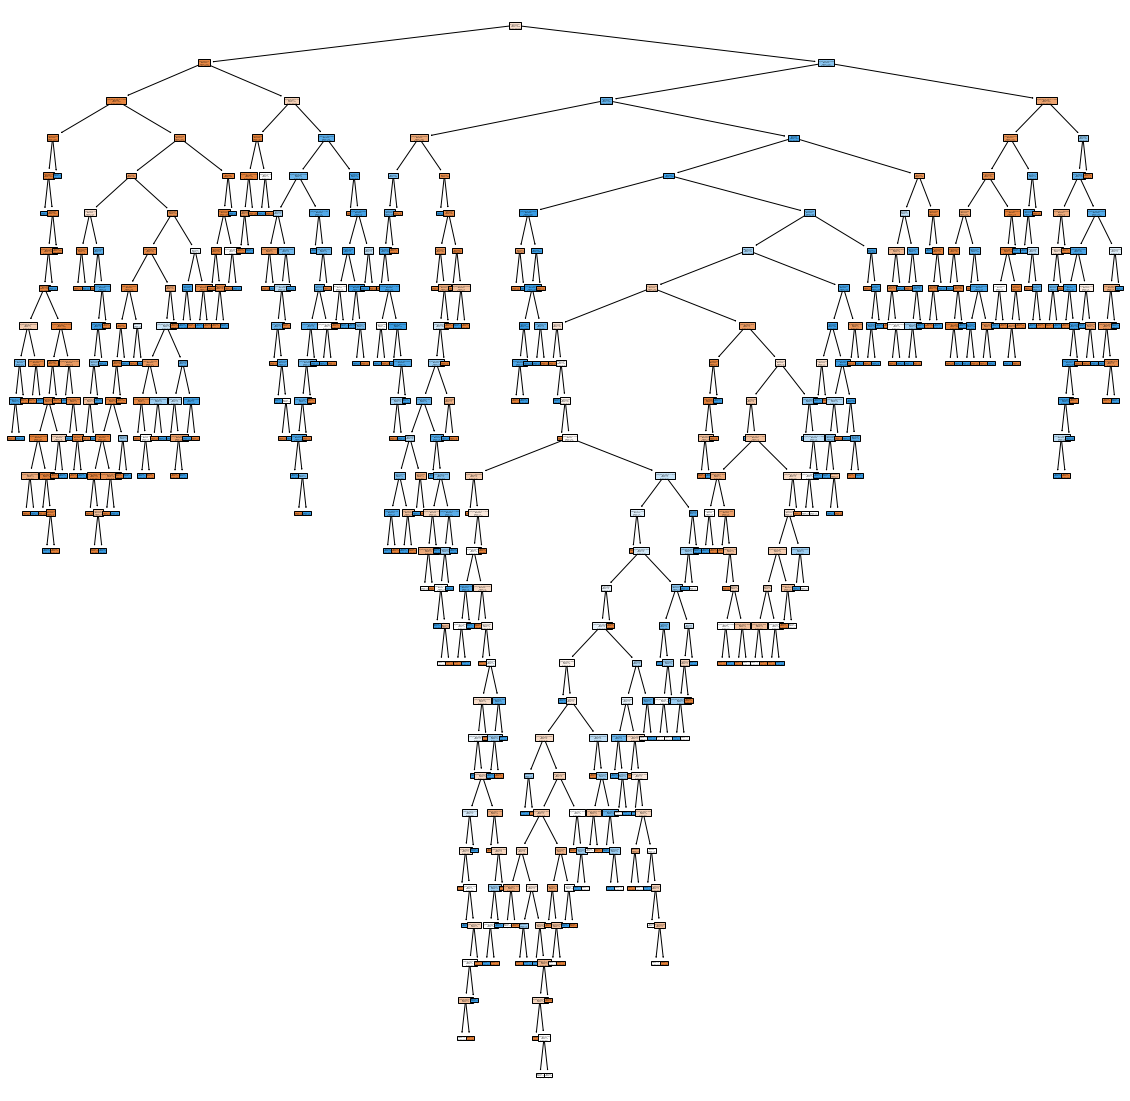

In [51]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(classifier, 
                   feature_names=colu,
                   filled=True)

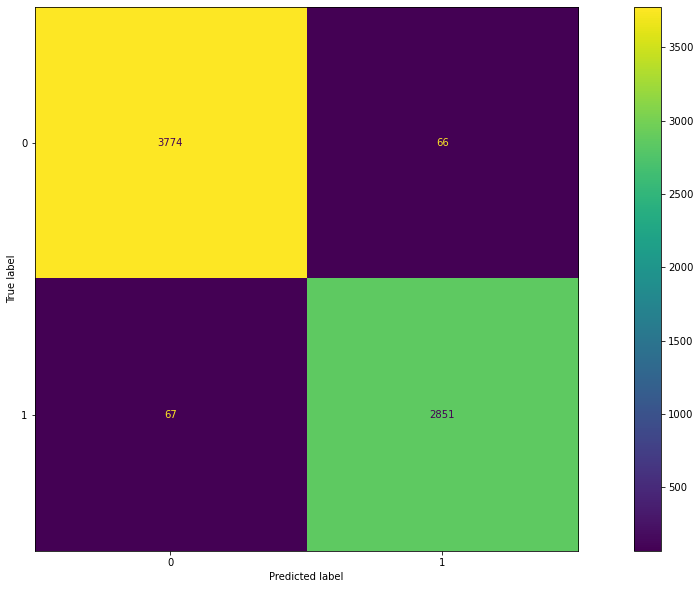

In [58]:
plt.rcParams["figure.figsize"] = (20,10)
cm = confusion_matrix(ys_te, predicted_target, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [53]:
print(classification_report(ys_te, predicted_target,target_names=['0:anomaly','1:normal']))

              precision    recall  f1-score   support

   0:anomaly       0.98      0.98      0.98      3840
    1:normal       0.98      0.98      0.98      2918

    accuracy                           0.98      6758
   macro avg       0.98      0.98      0.98      6758
weighted avg       0.98      0.98      0.98      6758



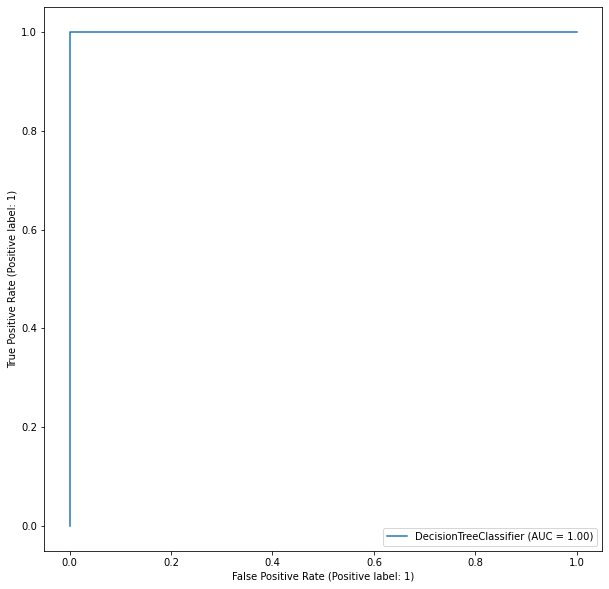

In [59]:
plt.rcParams["figure.figsize"] = (10,10)
plot_roc_curve(classifier, xs_te, predicted_target) 